In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

from IPython.display import display
from scipy import stats
from sklearn.model_selection import train_test_split

%matplotlib inline 
np.random.seed(42)

### Loading From UCI (Train and validation data)
- 500 columns
- 2000 obs from training, and 2000 obs from validation $\Rightarrow$ 4000 total observations

In [2]:
df = pd.read_pickle('instructors_madelon_reduced_features.p')

In [3]:
df.head()

,_id,feat_257,feat_269,feat_308,feat_315,feat_336,feat_341,feat_395,feat_504,feat_526,...,feat_701,feat_724,feat_736,feat_769,feat_808,feat_829,feat_867,feat_920,feat_956,target
0,170866,0.252421,3.059553,0.549202,1.505400,0.558945,2.649557,0.918241,0.773806,0.260477,...,-2.694026,-1.714143,0.688705,-0.780640,-0.162773,2.598932,1.171268,-2.489237,0.226046,0
1,90554,1.353174,0.260890,-2.233127,1.034565,1.351185,0.452291,-0.229178,1.502204,1.815267,...,-1.656428,1.125663,1.378048,1.882807,-1.209783,3.086035,0.069695,-1.371033,0.345675,0
2,44817,-0.778791,-4.338013,-1.926604,-1.470901,-0.409953,-3.527393,-0.402595,-0.275500,-0.217137,...,3.651437,1.867085,-0.056123,1.451549,0.366022,-3.556293,-1.848013,3.627442,-0.543230,0
3,13966,-1.311862,1.530704,0.921769,1.067135,-1.778740,-0.604283,-0.020201,-1.120061,0.361306,...,-1.633790,-1.029503,-0.609389,-0.366483,0.820188,-1.474820,1.439293,-0.415038,-1.506730,1
4,189542,1.972786,1.694196,-3.190931,0.102184,4.204283,1.477417,0.429671,-2.264772,1.107840,...,-0.449825,2.311717,3.197871,-1.011152,-3.580152,1.401875,-2.381935,1.252636,0.583428,1


In [4]:
df = df.set_index('_id')

In [5]:
df.head()

,feat_257,feat_269,feat_308,feat_315,feat_336,feat_341,feat_395,feat_504,feat_526,feat_639,...,feat_701,feat_724,feat_736,feat_769,feat_808,feat_829,feat_867,feat_920,feat_956,target
_id,,,,,,,,,,,,,,,,,,,,,
170866,0.252421,3.059553,0.549202,1.505400,0.558945,2.649557,0.918241,0.773806,0.260477,0.291553,...,-2.694026,-1.714143,0.688705,-0.780640,-0.162773,2.598932,1.171268,-2.489237,0.226046,0
90554,1.353174,0.260890,-2.233127,1.034565,1.351185,0.452291,-0.229178,1.502204,1.815267,0.758823,...,-1.656428,1.125663,1.378048,1.882807,-1.209783,3.086035,0.069695,-1.371033,0.345675,0
44817,-0.778791,-4.338013,-1.926604,-1.470901,-0.409953,-3.527393,-0.402595,-0.275500,-0.217137,-0.298457,...,3.651437,1.867085,-0.056123,1.451549,0.366022,-3.556293,-1.848013,3.627442,-0.543230,0
13966,-1.311862,1.530704,0.921769,1.067135,-1.778740,-0.604283,-0.020201,-1.120061,0.361306,-1.790795,...,-1.633790,-1.029503,-0.609389,-0.366483,0.820188,-1.474820,1.439293,-0.415038,-1.506730,1
189542,1.972786,1.694196,-3.190931,0.102184,4.204283,1.477417,0.429671,-2.264772,1.107840,0.606318,...,-0.449825,2.311717,3.197871,-1.011152,-3.580152,1.401875,-2.381935,1.252636,0.583428,1


In [6]:
df = df.reset_index(drop = True)

In [7]:
df.head()

,feat_257,feat_269,feat_308,feat_315,feat_336,feat_341,feat_395,feat_504,feat_526,feat_639,...,feat_701,feat_724,feat_736,feat_769,feat_808,feat_829,feat_867,feat_920,feat_956,target
0,0.252421,3.059553,0.549202,1.505400,0.558945,2.649557,0.918241,0.773806,0.260477,0.291553,...,-2.694026,-1.714143,0.688705,-0.780640,-0.162773,2.598932,1.171268,-2.489237,0.226046,0
1,1.353174,0.260890,-2.233127,1.034565,1.351185,0.452291,-0.229178,1.502204,1.815267,0.758823,...,-1.656428,1.125663,1.378048,1.882807,-1.209783,3.086035,0.069695,-1.371033,0.345675,0
2,-0.778791,-4.338013,-1.926604,-1.470901,-0.409953,-3.527393,-0.402595,-0.275500,-0.217137,-0.298457,...,3.651437,1.867085,-0.056123,1.451549,0.366022,-3.556293,-1.848013,3.627442,-0.543230,0
3,-1.311862,1.530704,0.921769,1.067135,-1.778740,-0.604283,-0.020201,-1.120061,0.361306,-1.790795,...,-1.633790,-1.029503,-0.609389,-0.366483,0.820188,-1.474820,1.439293,-0.415038,-1.506730,1
4,1.972786,1.694196,-3.190931,0.102184,4.204283,1.477417,0.429671,-2.264772,1.107840,0.606318,...,-0.449825,2.311717,3.197871,-1.011152,-3.580152,1.401875,-2.381935,1.252636,0.583428,1


In [8]:
df.columns = [257, 269, 308, 315, 336, 341, 395, 504, 526, 639, 681, 701, 724, 736, 769, 808, 829, 867, 920, 956, 'target']

In [9]:
df.head()

,257,269,308,315,336,341,395,504,526,639,...,701,724,736,769,808,829,867,920,956,target
0,0.252421,3.059553,0.549202,1.505400,0.558945,2.649557,0.918241,0.773806,0.260477,0.291553,...,-2.694026,-1.714143,0.688705,-0.780640,-0.162773,2.598932,1.171268,-2.489237,0.226046,0
1,1.353174,0.260890,-2.233127,1.034565,1.351185,0.452291,-0.229178,1.502204,1.815267,0.758823,...,-1.656428,1.125663,1.378048,1.882807,-1.209783,3.086035,0.069695,-1.371033,0.345675,0
2,-0.778791,-4.338013,-1.926604,-1.470901,-0.409953,-3.527393,-0.402595,-0.275500,-0.217137,-0.298457,...,3.651437,1.867085,-0.056123,1.451549,0.366022,-3.556293,-1.848013,3.627442,-0.543230,0
3,-1.311862,1.530704,0.921769,1.067135,-1.778740,-0.604283,-0.020201,-1.120061,0.361306,-1.790795,...,-1.633790,-1.029503,-0.609389,-0.366483,0.820188,-1.474820,1.439293,-0.415038,-1.506730,1
4,1.972786,1.694196,-3.190931,0.102184,4.204283,1.477417,0.429671,-2.264772,1.107840,0.606318,...,-0.449825,2.311717,3.197871,-1.011152,-3.580152,1.401875,-2.381935,1.252636,0.583428,1


In [10]:
df.shape #100000 observations

(100000, 21)

In [11]:
from sklearn.preprocessing import StandardScaler

### EDA with the reduced feature list

In [12]:
X = df.drop('target', axis = 1)

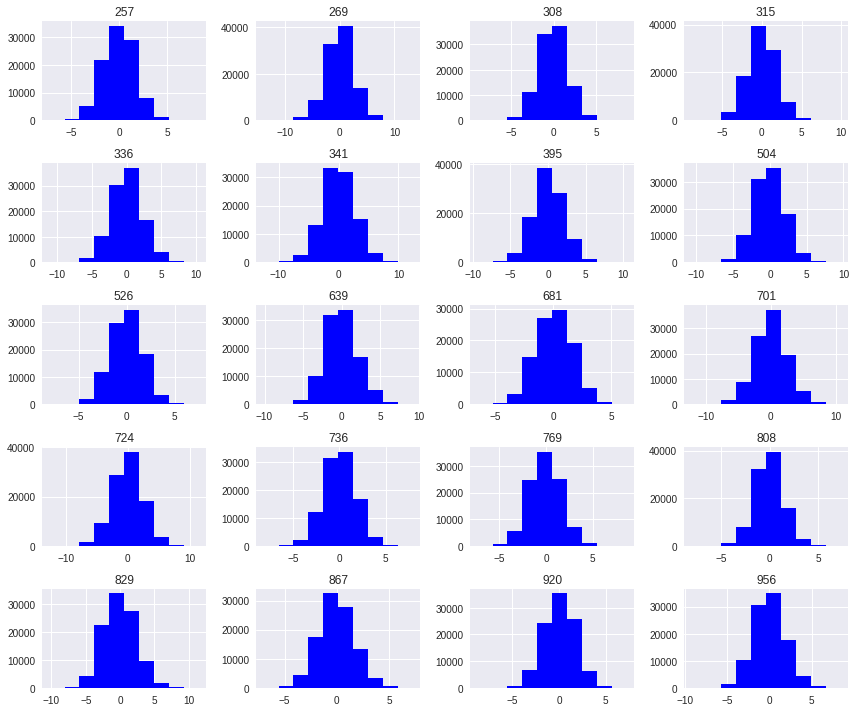

In [13]:
fig = plt.figure(figsize = (12,10))
j = 0

for i in X.columns:
    j += 1
    fig.add_subplot(5,4,j)
    plt.hist(df[i], color= 'b') #'b', 'r', 'y', 'k', 'w'
    plt.title(i)
    # plt.savefig
    
plt.tight_layout()

In [14]:
y = df['target']

In [15]:
cor = X.corr()

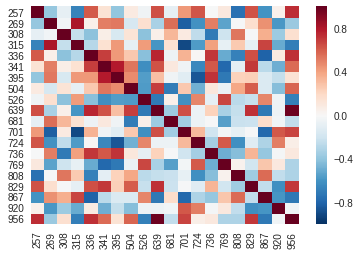

In [16]:
sns.heatmap(cor)

In [17]:
big_cor = cor.where(abs(cor) > .8)

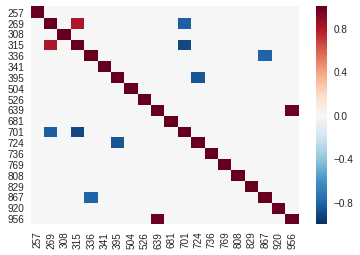

In [18]:
sns.heatmap(big_cor.replace(np.nan, 0)) #not a lot of high correlations => good

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.cross_validation import train_test_split

from sklearn.preprocessing import StandardScaler

/opt/conda/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [20]:
def fit_benchmark_model(X, y, model, name):
    #train test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)
    #scale the data
    scaler = StandardScaler()
    # Fit_transform
    X_train_scaled = scaler.fit_transform(X_train)
    # transform
    X_test_scaled = scaler.transform(X_test)
    
    model.fit(X_train_scaled, y_train)
    return (name, model.score(X_train_scaled, y_train), model.score(X_test_scaled, y_test))

In [21]:
fit_benchmark_model(X, y, LogisticRegression(C = 100), 'Logistic Regression')

('Logistic Regression', 0.6057866666666667, 0.60236000000000001)

In [22]:
fit_benchmark_model(X, y, KNeighborsClassifier(), 'KNN')

('KNN', 0.89532, 0.84719999999999995)

In [23]:
fit_benchmark_model(X, y, DecisionTreeClassifier(), 'Decision tree')

('Decision tree', 1.0, 0.78480000000000005)

In [24]:
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.decomposition import PCA

In [25]:
subjective_pca = PCA(n_components=5)
subjective_pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=5, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [26]:
subjective_pca.explained_variance_ratio_

array([ 0.36623852,  0.31958935,  0.13661047,  0.10214676,  0.0754149 ])

In [27]:
0.36623852+0.31958935+0.13661047+0.1021467 + 0.0754149 

0.9999999400000001

In [28]:
X_pca = subjective_pca.transform(X)
X_pca = pd.DataFrame(X_pca)

In [29]:
decent11 = [257, 308, 341, 504, 526, 681, 736, 769, 808, 829, 920]
X = X[decent11]

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

from sklearn.model_selection import GridSearchCV

In [31]:
knc_params = {
        'n_neighbors':[3,4,5,6,7,8,9,10]
    }

knc_gs = GridSearchCV(KNeighborsClassifier(), param_grid= knc_params, cv=5)
knc_gs.fit(X_train, y_train)
knc_gs.best_estimator_

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=9, p=2,
           weights='uniform')

In [32]:
knc_gs.score(X_train, y_train), knc_gs.score(X_test, y_test)

(0.88104000000000005, 0.84940000000000004)

In [34]:
from sklearn.ensemble import RandomForestClassifier

In [35]:
rfparams = {
    'n_estimators':[100],
    'max_features':['auto']
}

rf_gs = GridSearchCV(RandomForestClassifier(), param_grid=rfparams, cv=5,n_jobs=-1)
rf_gs.fit(X_train, y_train)
rf_gs.best_params_

{'max_features': 'auto', 'n_estimators': 100}

In [36]:
rf_gs.score(X_train, y_train), rf_gs.score(X_test, y_test)

(0.99998666666666669, 0.85572000000000004)

In [38]:
y_pred = rf_gs.predict(X_test)
confusion_matrix(y_test, y_pred)

array([[10744,  1770],
       [ 1837, 10649]])

### Now with PCA

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, random_state = 42)

In [31]:
knc_params = {
        'n_neighbors':[3,4,5,6,7,8,9,10]
    }

knc_gs = GridSearchCV(KNeighborsClassifier(), param_grid= knc_params, cv=5)
knc_gs.fit(X_train, y_train)
knc_gs.best_estimator_

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=7, p=2,
           weights='uniform')

In [32]:
knc_gs.score(X_train, y_train), knc_gs.score(X_test, y_test)

(0.88533333333333331, 0.84855999999999998)

In [34]:
rfparams = {
    'n_estimators':[100],
    'max_features':['auto']
}

rf_gs = GridSearchCV(RandomForestClassifier(), param_grid=rfparams, cv=2,n_jobs=-1)
rf_gs.fit(X_train, y_train)
rf_gs.best_params_

{'max_features': 'auto', 'n_estimators': 100}

In [35]:
rf_gs.score(X_train, y_train), rf_gs.score(X_test, y_test)

(0.99997333333333338, 0.85224)